In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
X = np.ones((10000,1000, 100))
Y = np.concatenate((np.ones(8000), np.zeros(2000)))

In [3]:
X_1, X_2, Y_1, Y_2 = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [6]:
print(X_2.shape)

(2000, 1000, 100)


In [18]:
print(X_1.shape)

(8000, 1000, 100)


In [129]:
print(sum(Y_1 == 0))

1600


In [66]:
from sklearn.model_selection import StratifiedKFold, KFold
import numpy as np
X, y = np.ones((50, 1)), np.hstack(([0] * 45, [1] * 5))
skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(X, y):
    print('train -  {}   |   test -  {}'.format(
        np.bincount(y[train]), np.bincount(y[test])))
    print(y[train])
    
# kf = KFold(n_splits=3)
# for train, test in kf.split(X, y):
#     print('train -  {}   |   test -  {}'.format(
#         np.bincount(y[train]), np.bincount(y[test])))

train -  [30  3]   |   test -  [15  2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]
train -  [30  3]   |   test -  [15  2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]
train -  [30  4]   |   test -  [15  1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1]


In [2]:
import torch 

In [6]:
a = torch.ones((3,4,5,6))

In [12]:
a.mean(dim=2).shape

torch.Size([3, 4, 6])

In [3]:
import tensorflow as tf

def assert_shape(tensor, expected_shape):
    tensor_shape = tensor.get_shape().as_list()
    error_message = "tensor {name} shape {actual} != {expected}"
    assert tensor_shape == expected_shape, error_message.format(
        name=tensor.name, actual=tensor_shape, expected=expected_shape)

2025-04-09 22:45:41.841179: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-09 22:45:41.942105: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-09 22:45:41.979827: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-09 22:45:41.991824: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-09 22:45:42.070210: I tensorflow/core/platform/cpu_feature_guar

In [9]:
a = tf.constant([1,2,3])

In [10]:
a

TypeError: 

In [11]:
print(a)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


In [9]:
from data import MyCifar10

cifar10 = MyCifar10(False, None)

In [10]:
cifar10.data.shape

(10000, 32, 32, 3)

In [11]:
len(cifar10.targets)

10000

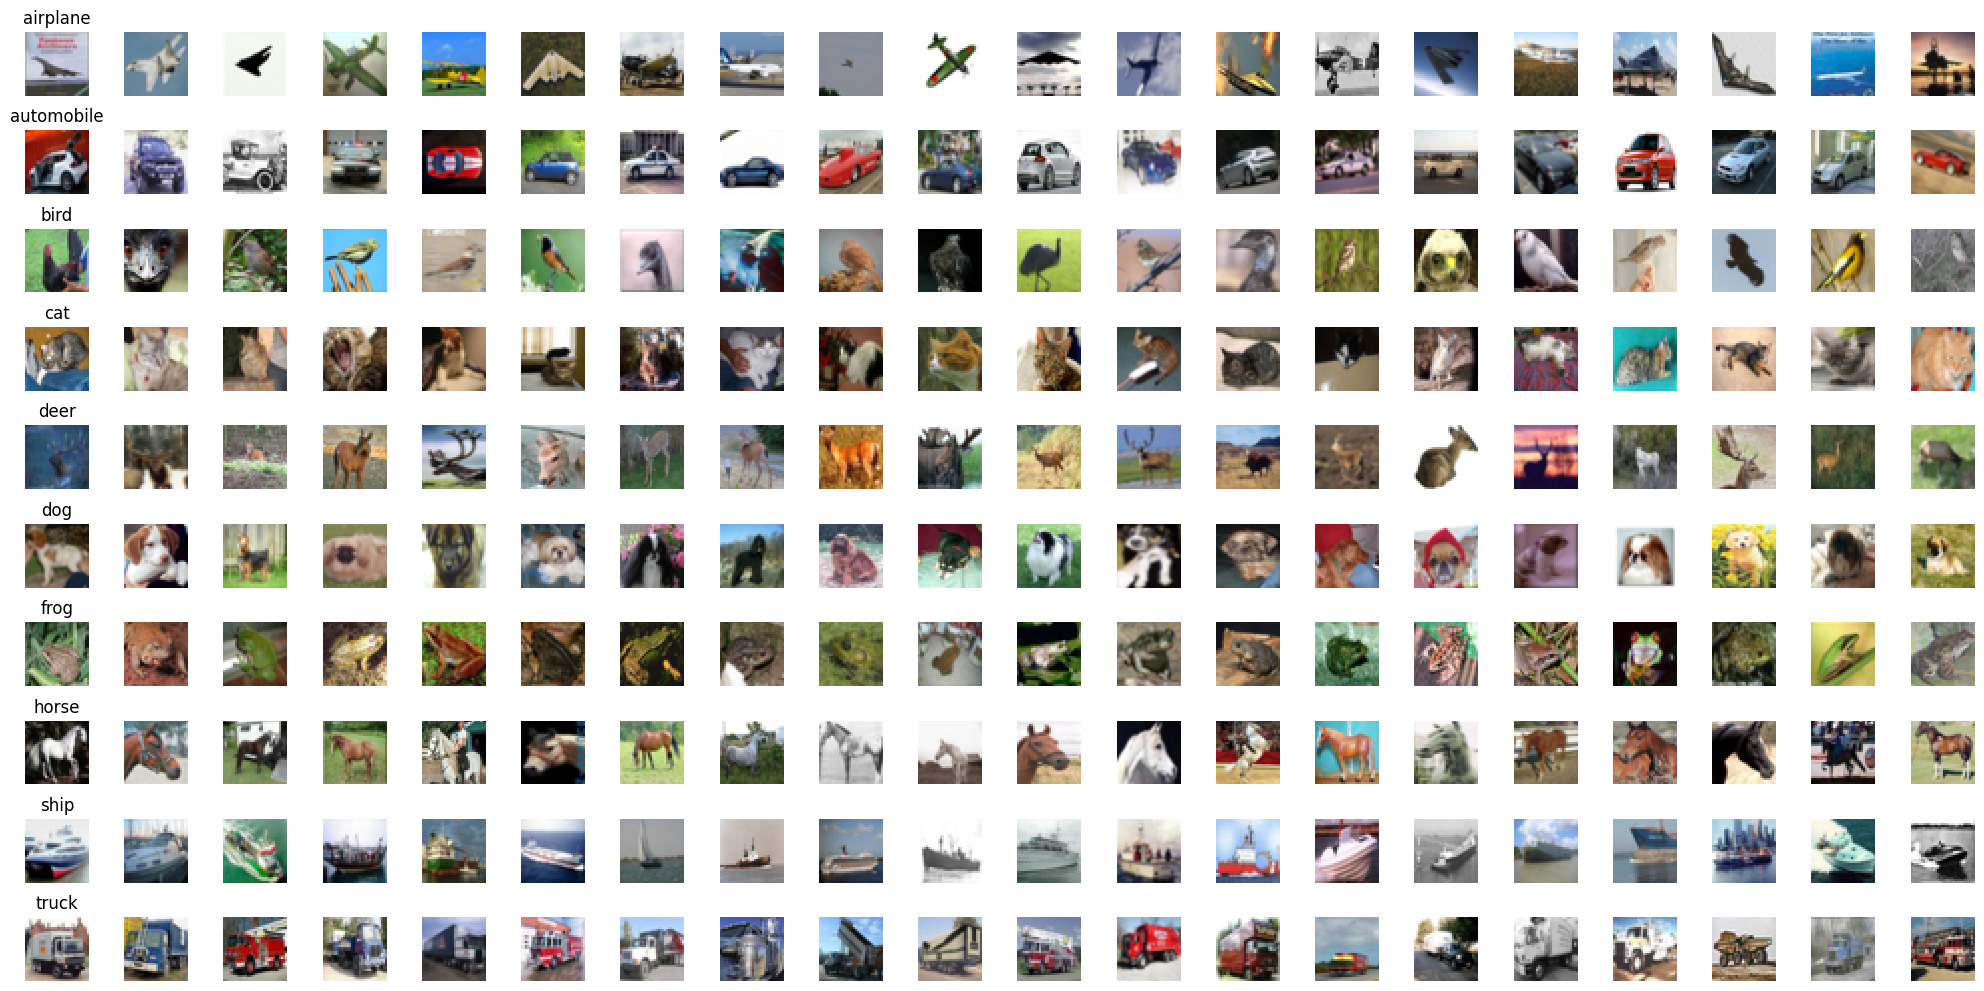

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Create a figure to display the images
fig, axes = plt.subplots(10, 20, figsize=(20, 10))
fig.subplots_adjust(hspace=0.15)

# Find and plot first 20 images of each class
for class_idx in range(10):
    # Find indices where the target matches the current class
    indices = np.where(np.array(cifar10.targets) == class_idx)[0][:20]
    
    # Plot the first 20 images for this class
    for img_idx, idx in enumerate(indices):
        ax = axes[class_idx, img_idx]
        ax.imshow(cifar10.data[idx])
        ax.axis('off')
        
        # Add class name for the first image in each row
        if img_idx == 0:
            ax.set_title(f"{class_names[class_idx]}", fontsize=12)

plt.tight_layout()
plt.show()